In [1]:
# Program 1

import numpy as np
import pandas as pd

# Loading Data from a CSV File
data = pd.DataFrame(data=pd.read_csv("Training.csv"))
print(data)

# Separating concept features from Target
concepts = np.array(data.iloc[:, 0:-1])
target = np.array(data.iloc[:, -1])


def learn(concepts, target):
    """
    learn() function implements the learning method of the Candidate elimination algorithm.
    Arguments:
    concepts - a data frame with all the features
    target - a data frame with corresponding output values
    """
    # Initialise S0 with the first instance from concepts
    specific_h = concepts[0].copy()
    print("initialization of specific_h and general_h")
    print(specific_h)

    # Initialize general_h
    general_h = [["?" for _ in range(len(specific_h))] for _ in range(len(specific_h))]
    print(general_h)

    # The learning iterations
    for i, h in enumerate(concepts):
        print("Step", i + 1)
        # Checking if the hypothesis has a positive target
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                # Change values in S & G only if values change
                if h[x] != specific_h[x]:
                    specific_h[x] = "?"
                    general_h[x][x] = "?"
        # Checking if the hypothesis has a negative target
        if target[i] == "No":
            for x in range(len(specific_h)):
                # For negative hypothesis, change values only in G
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = "?"

        print("Specific_h", i + 1, ":\n", specific_h)
        print("General_h", i + 1, ":\n", general_h)

    # Find indices where we have empty rows, meaning those that are unchanged
    indices = [
        i
        for i, val in enumerate(general_h)
        if val == ["?" for _ in range(len(specific_h))]
    ]

    for i in indices:
        # Remove those rows from general_h
        general_h.remove(["?" for _ in range(len(specific_h))])

    # Return final values
    return specific_h, general_h


s_final, g_final = learn(concepts, target)
print("Final Specific_h:\n", s_final)
print("Final General_h:\n", g_final)

      Sky Airtemp Humidity    Wind Water Forecast WaterSport
0   Sunny    Warm   Normal  Strong  Warm     Same        Yes
1   Sunny    Warm     High  Strong  Warm     Same        Yes
2  Cloudy    Cold     High  Strong  Warm   Change         No
3   Sunny    Warm     High  Strong  Cool   Change        Yes
initialization of specific_h and general_h
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
Step 1
Specific_h 1 :
 ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
General_h 1 :
 [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
Step 2
Specific_h 2 :
 ['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']
General_h 2 :
 [['?', '?', '?', '?', '?', '?'], ['?', '?', '?',

In [2]:
# Program 2

import heapq

def a_star(grid, start, goal):
    # Directions for moving (right, left, down, up)
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def is_valid(x, y):
        return 0 <= x < len(grid) and 0 <= y < len(grid[0]) and grid[x][y] == 0

    # Priority queue (f, g, x, y)
    open_list = [(heuristic(start, goal), 0, start[0], start[1])]
    came_from = {}
    g_costs = {start: 0}

    while open_list:
        _, g, x, y = heapq.heappop(open_list)

        if (x, y) == goal:
            path = []
            while (x, y) in came_from:
                path.append((x, y))
                x, y = came_from[(x, y)]
            return path[::-1] + [goal]  # Return reversed path with goal

        for dx, dy in directions:
            nx, ny = x + dx, y + dy

            if not is_valid(nx, ny) or (nx, ny) in came_from:
                continue

            tentative_g = g + 1

            if (nx, ny) not in g_costs or tentative_g < g_costs[(nx, ny)]:
                g_costs[(nx, ny)] = tentative_g
                f = tentative_g + heuristic((nx, ny), goal)
                heapq.heappush(open_list, (f, tentative_g, nx, ny))
                came_from[(nx, ny)] = (x, y)

    return None  # No path found


# Example Usage
grid = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1],
    [1, 0, 1, 1, 0]
]
start = (0, 0)
goal = (4, 4)

path = a_star(grid, start, goal)
print("Path:", path)

Path: None


Slope (m): 0.9987762237762241
Intercept (b): 0.0954545454545439


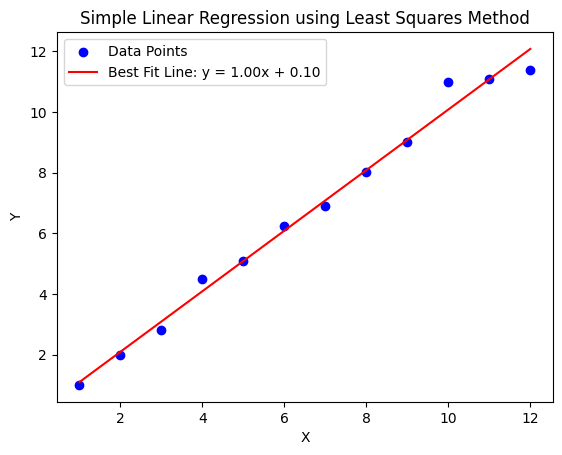

In [3]:
# Program 3

#Got output
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the slope (m) and intercept (b) using the Least Squares Method
def linear_regression(x, y):
    n = len(x)

    # Calculate the sums needed for the formulas
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    # Calculate the slope (m) and intercept (b)
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    b = (sum_y - m * sum_x) / n

    return m, b

# Function to predict y values using the model y = mx + b
def predict(x, m, b):
    return m * x + b

# Example data (x, y)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y = np.array([1, 2, 2.8, 4.5, 5.1, 6.23, 6.9, 8.01, 9.01, 11, 11.1, 11.4])

# Perform linear regression
m, b = linear_regression(x, y)

# Print the slope and intercept
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Predict y values
y_pred = predict(x, m, b)

# Plotting the data points and the best-fitting line
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label=f'Best Fit Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression using Least Squares Method')
plt.legend()
plt.show()

ACCURACY: 100.00%

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



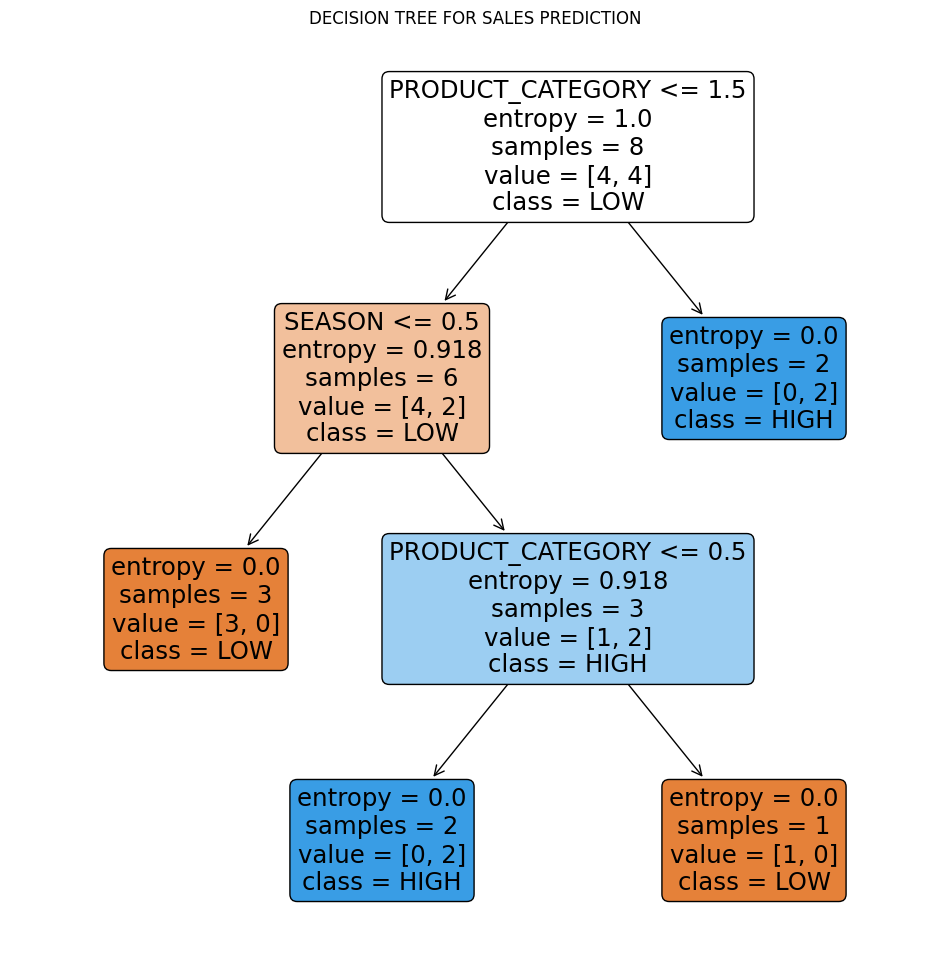

In [4]:
# Program 4

# got output
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Sample dataset representing retail sales
data = {
    'MARKETING_SPEND': [1500, 2300, 3200, 1800, 1200, 2500, 3500, 4000, 1700, 3000],
    'PRODUCT_CATEGORY': ['ELECTRONICS', 'CLOTHING', 'ELECTRONICS', 'CLOTHING', 'FURNITURE', 'ELECTRONICS', 'CLOTHING', 'FURNITURE', 'ELECTRONICS', 'CLOTHING'],
    'SEASON': ['HOLIDAY', 'REGULAR', 'HOLIDAY', 'REGULAR', 'HOLIDAY', 'REGULAR', 'HOLIDAY', 'REGULAR', 'HOLIDAY', 'REGULAR'],
    'STORE_TYPE': ['PHYSICAL', 'ONLINE', 'PHYSICAL', 'ONLINE', 'PHYSICAL', 'ONLINE', 'PHYSICAL', 'ONLINE', 'PHYSICAL', 'ONLINE'],
    'SALES': ['HIGH', 'LOW', 'HIGH', 'LOW', 'LOW', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'LOW']
}

# Convert into a DataFrame
df = pd.DataFrame(data)

# FEATURE ENCODING (LABEL ENCODING FOR categorical data)
lbl_encoder = LabelEncoder()

df['PRODUCT_CATEGORY'] = lbl_encoder.fit_transform(df['PRODUCT_CATEGORY'])
df['SEASON'] = lbl_encoder.fit_transform(df['SEASON'])
df['STORE_TYPE'] = lbl_encoder.fit_transform(df['STORE_TYPE'])
df['SALES'] = lbl_encoder.fit_transform(df['SALES'])

# Split dataset into features (X) and target (Y)
X = df.drop(['SALES'], axis=1)  # Features
y = df['SALES']  # Target

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier model
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"ACCURACY: {accuracy * 100:.2f}%")
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

# VISUALIZE THE DECISION TREE
plt.figure(figsize=(12, 12))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['LOW', 'HIGH'], rounded=True)
plt.title("DECISION TREE FOR SALES PREDICTION")
plt.show()

In [5]:
# Program 6

import numpy as np

def step_function(x):
    return np.where(x >= 0, 1, 0)

class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        self.input_size = input_size          # Number of input features
        self.learning_rate = learning_rate    # Learning rate
        self.epochs = epochs                  # Number of iterations
        self.weights = np.zeros(input_size)   # Initialize weights to zero
        self.bias = 0                         # Initialize bias to zero

    def train(self, X, y):
        for epoch in range(self.epochs):
            for i in range(len(X)):
                linear_output = np.dot(X[i], self.weights) + self.bias
                predicted = step_function(linear_output)
                error = y[i] - predicted
                
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return step_function(linear_output)

    def get_parameters(self):
        return self.weights, self.bias

if __name__ == "__main__":
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

    y = np.array([0, 1, 1, 0])
    perceptron = SingleLayerPerceptron(input_size=2, learning_rate=0.1, epochs=1000)

    perceptron.train(X, y)

    predictions = perceptron.predict(X)

    print("Predictions after training:")
    print(predictions)

    weights, bias = perceptron.get_parameters()
    print("\nFinal weights:", weights)
    print("Final bias:", bias)

Predictions after training:
[1 1 0 0]

Final weights: [-0.1  0. ]
Final bias: 0.0


Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Feature Importances:
sepal length (cm): 0.1081
sepal width (cm): 0.0304
petal length (cm): 0.4400
petal width (cm): 0.4215


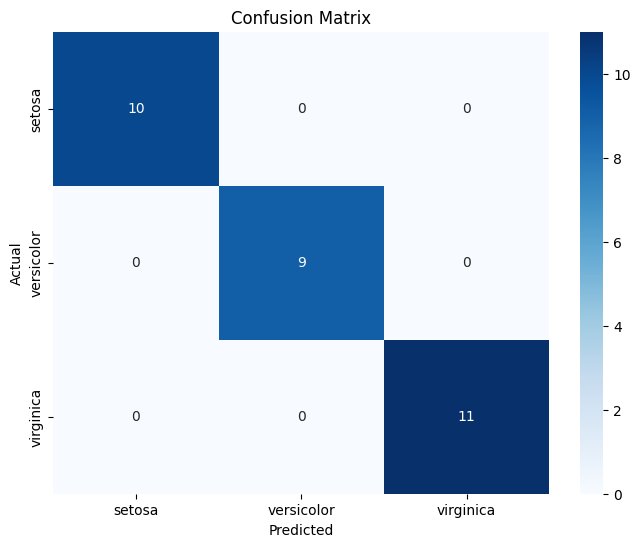

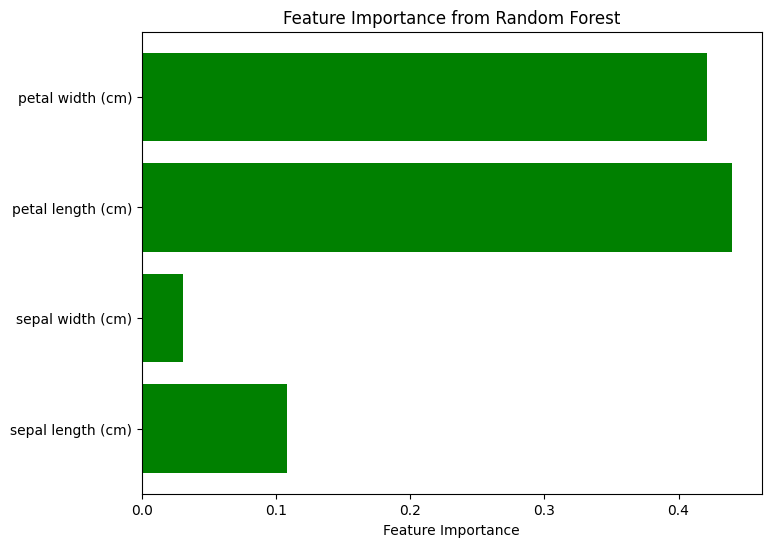

In [ ]:
# Program 8 A

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data  
y = iris.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

feature_importances = rf_clf.feature_importances_
print("\nFeature Importances:")

for i, feature in enumerate(iris.feature_names):
    print(f"{feature}: {feature_importances[i]:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(8, 6))
plt.barh(iris.feature_names, feature_importances, color='green')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Feature Importances:
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.5000
petal width (cm): 0.5000


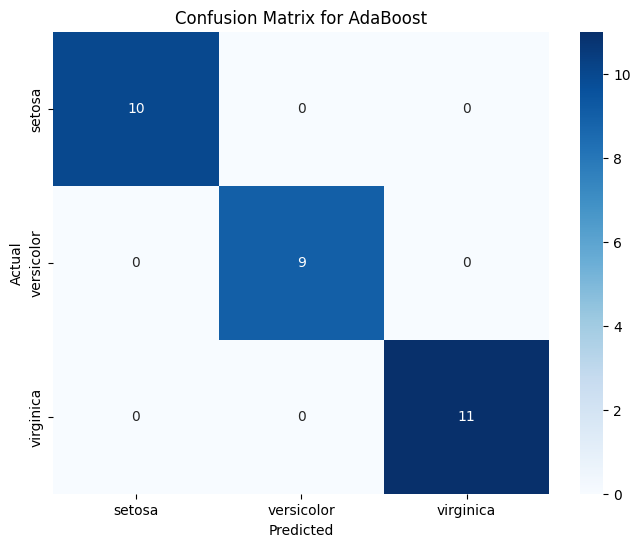

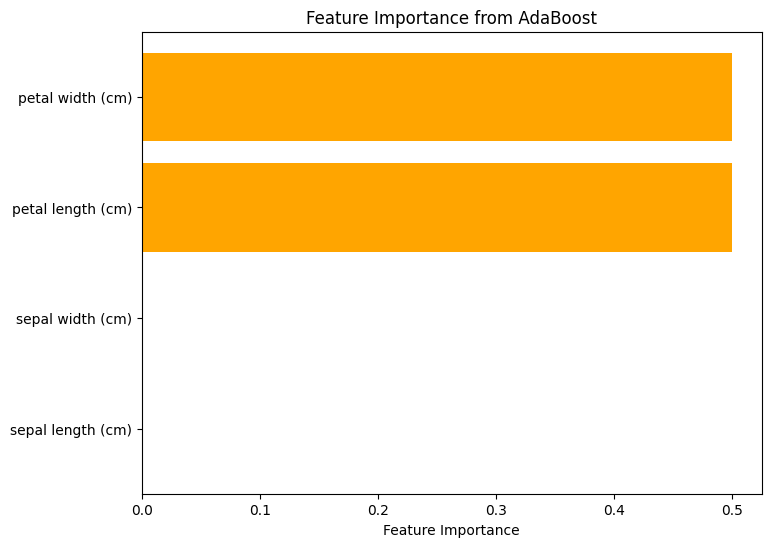

In [7]:
# Program 8 B

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data 
y = iris.target  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(cr)

feature_importances = ada_boost.feature_importances_

print("\nFeature Importances:")
for i, feature in enumerate(iris.feature_names):
    print(f"{feature}: {feature_importances[i]:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

plt.figure(figsize=(8, 6))
plt.barh(iris.feature_names, feature_importances, color='orange')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from AdaBoost')
plt.show()

C:\Users\nanda\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'EM Algorithm')

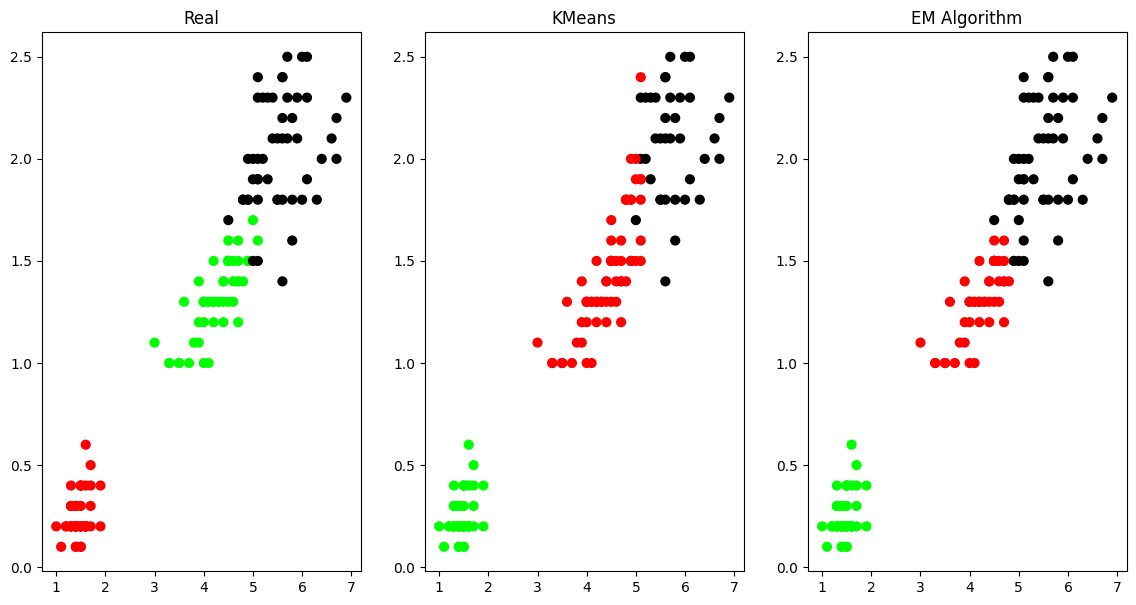

In [8]:
# Program 9

#pgm9:EM algorithm
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
dataset=load_iris()
# print(dataset)
X=pd.DataFrame(dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(dataset.target) 
y.columns=['Targets']
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40) 
plt.title('Real')
# K-PLOT
plt.subplot(1,3,2)
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.title('KMeans') 
# GMM PLOT
scaler=preprocessing.StandardScaler()
scaler.fit(X) 
xsa=scaler.transform(X) 
xs=pd.DataFrame(xsa,columns=X.columns) 
gmm=GaussianMixture(n_components=3)
gmm.fit(xs) 
y_cluster_gmm=gmm.predict(xs)
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('EM Algorithm')

In [9]:
# Program 10

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import datasets
iris=datasets.load_iris()

iris_data=iris.data

iris_labels=iris.target
print(iris_data)
print(iris_labels)
x_train,x_test,y_train,y_test=train_test_split(iris_data,iris_labels)

classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)
print("Confusion matrix is as follows")
print(confusion_matrix(y_test,y_pred))
print("Accuracy Metrics")
print(classification_report(y_test,y_pred))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.